# Redes neuronales con Tensorflow

**Modelo base del perceptron**: Así como una neurona biologica tiene dendritas que le permiten recibir diversas señales y una célula central que le permite procesar la información recibida, una neurona artificial (*perceptron*) tiene varios canales de entrada los cuales convergen a una celda de procesamiento de la cual sale un output. Ver Fig.1 (contenido tomado de [aquí](https://appliedgo.net/perceptron/)):

<figure>
<img src="neuron.png" alt="Alt text that describes the graphic" title="Title text" />
    <figcaption> Fig.1 - Analogía entre neurona biológica y un perceptron. </figcaption>
</figure>

**Procesamiento dentro de un perceptron:** Un perceptron recibe informacion desde diferentes fuentes (otras neuronas o fuentes externas). A cada fuente de informacion o entrada, $x_i$, se le asigna un peso, $w_i$, el cual es un indicador de la importancia relativa de este input respecto de los otros. Luego el perceptron aplica una funcion $f$ sobre la suma ponderada de los inputs con sus respectivos pesos:

\begin{equation}
    \text{output} = f\left(\sum_i w_i x_i +b \right)
\end{equation}

Aquí, a la funcion $f(x)$ se le conoce como _función de activacion_. y debe ser no-lineal. El proposito de esta función es darle la capacidad a las neuronas de parametrizar represetanciones no-lineales que son comunes en los datos de entrada. Ver Fig.2 (contenido tomado de [aquí](https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/)).

<figure>
<img src="perceptron.png" alt="Alt text that describes the graphic" title="Title text" />
    <figcaption> Fig.2 - Input-output en un modelo de perceptron. </figcaption>
</figure>
<hr/>

### Funciones de activación más usadas:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

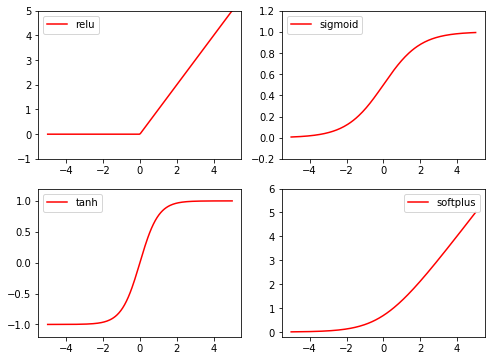

In [3]:
# fake data
x = np.linspace(-5, 5, 200)     # x data, shape=(100, 1)

# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

# Construcción de una Red Neuronal Densa

**Redes Neuronales multi-capa**: Para un problema de regresion no lineal básico consideraremos una red neuronal relativamente simple. En el área del aprendizaje profundo existen lo que se llama redes multi-capa o redes profundas, estas son redes donde existen varias capas y cada una de estas contiene un cierto número de neuronas (perceptrones). En el modelo que consideraremos las neuronas de una misma capa no estan conectadas, pero si tienen conectividad densa con las otras capas, esto quiere decir que cada neurona de una cierta capa esta conectada con todas las demas neuronas de las capas adyacentes (Ver Fig.3 tomado de la [documentacion del curso de Deep Learning de la U. de Stanford](http://cs231n.github.io/convolutional-networks/#conv)). 

<figure>
<img src="neural_net2.jpeg" alt="Alt text that describes the graphic" title="Title text" />
    <figcaption> Fig.3 - Red Neuronal Densa con dos capas ocultas. </figcaption>
</figure>

En Tensorflow, es posible construir una Red neuronal customizada a partir de layers y cada capa se puede construir con las preferencias que se deseen usando `tf.layers.dense` siempre y cuando se considere usar capas densas (ver detalles en [docs](https://www.tensorflow.org/api_docs/python/tf/layers/dense)):

```python
tf.layers.dense(
    inputs,
    units,
    activation=None,
    use_bias=True,
    kernel_initializer=None,
    bias_initializer=tf.zeros_initializer(),
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    trainable=True,
    name=None,
    reuse=None
)
```

<hr/>

* primero construimos datos artificiales a los cuales queremos ajustar un modelo de regresion

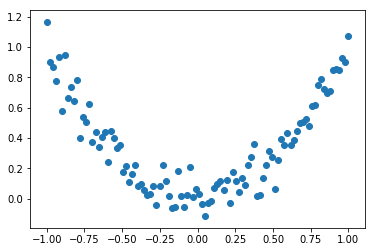

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise
# plot data
plt.scatter(x, y)
plt.show()

* Luego construimos una red como sigue:

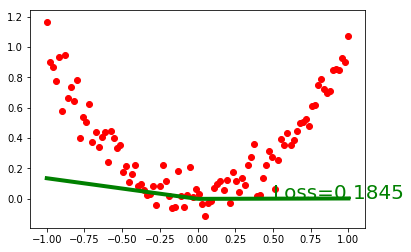

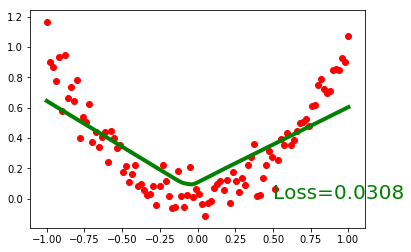

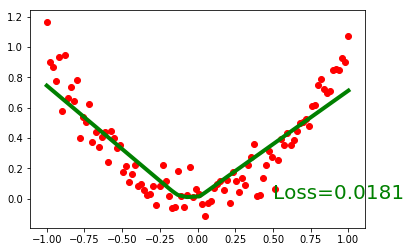

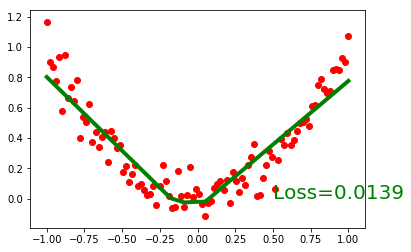

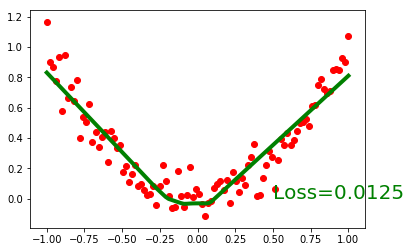

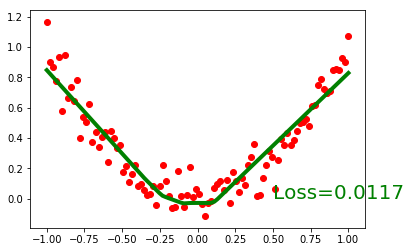

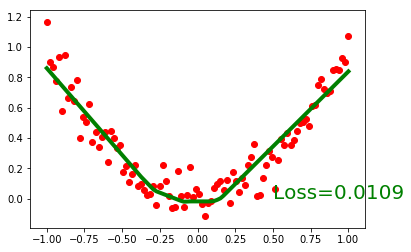

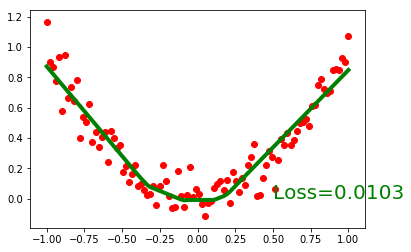

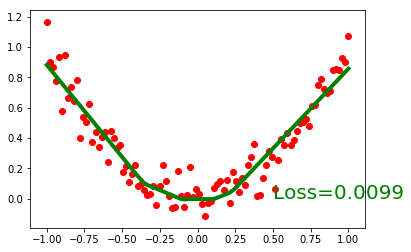

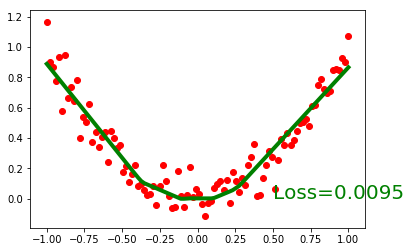

In [8]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

# neural network layers
l1 = tf.layers.dense(tf_x, 20, tf.nn.relu)          # hidden layer
output = tf.layers.dense(l1, 1)                     # output layer

loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

plt.ion()   # something about plotting

for step in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y,c='r')
        plt.plot(x, pred, 'g-', lw=4)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'green'})
        plt.pause(0.1)

plt.ioff()
plt.show()